<a href="https://colab.research.google.com/github/hdakhli/mlops-2024/blob/main/21_convolutional_neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification en utilisant un réseau de neurones convolutif (CNN)

In [1]:
!pip install tensorflow

In [8]:
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.python.keras.utils import np_utils

import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

X_train = X_train/255
X_test = X_test/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

(60000, 28, 28) (10000, 28, 28)


In [9]:
# Exemple d'architecture d'un réseau CNN:
# Nous initialisons un modèle vide, nous commençons ensuite à le construire couche par couche. Ici, nous avons une couche de convolution avec plusieurs paramètres :
# 
# 32 filtres
# un motif de taille (3, 3), aussi appelé kernel 3×3 pixels
# un pas de (1,1), aussi appelé strides
# une fonction d’activation.
# taille des données d'entrée (28, 28, 1) une image en 3 dimensions (hauteur, largeur, couleur), un 3D-tensor.
# Cette couche passe sur chaque pixel de l’image (strides = (1,1)) pour en extraire des motifs de taille 3×3 pixels (kernel = (3,3)). La couche exécute cette action 32 fois (filtres = 32) et produit 32 feature-maps chacune représente des caractéristiques différentes de l’image.

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',kernel_initializer='he_uniform',input_shape=(28, 28, 1)))


# La couche suivante est une couche de MaxPooling. Il existe deux principaux types de couches de regroupement :
# 
# Max Pooling : lorsque le filtre se déplace sur l’entrée, il sélectionne le pixel avec la valeur maximale à envoyer à la matrice de sortie. Cette approche tend à être utilisée plus souvent que la mise en commun moyenne.
# Average Pooling : Lorsque le filtre se déplace sur l’entrée, il calcule la valeur moyenne dans le champ réceptif à envoyer à la matrice de sortie.
# Nous allons utiliser une couche MaxPooling a un kernel de taille (2, 2) dans notre cas.

model.add(MaxPooling2D((2, 2)))


# Puisque nous avons commencé avec une image en 3 dimensions (hauteur, largeur, couleur), un 3D-tensor, et nous finissons avec un label à une dimension, un 1D-tensor. Une couche de convolution retourne un 3D-tensor, un tenseur à 3 dimensions, ce ne peut donc pas être la couche finale. Nous utilisons alors une couche appelée Flatten qui permet d’aplatir le tenseur, de réduire sa dimension. Elle prend en entrée un 3D-tensor et retourne un 1D-tensor.
model.add(Flatten())


# Dans notre cas, nous ajoutons deux couches entièrement connectées, la couche finale produit en sortie un vecteur de taille 10. 10 fait référence au nombre de classes de digits (de 0 à 9).
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [10]:
from keras.optimizers import Adam, SGD   

opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 42s 21ms/step - loss: 0.1328 - accuracy: 0.9598
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0464 - accuracy: 0.9858
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0276 - accuracy: 0.9914
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0180 - accuracy: 0.9939
Epoch 5/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0130 - accuracy: 0.9958


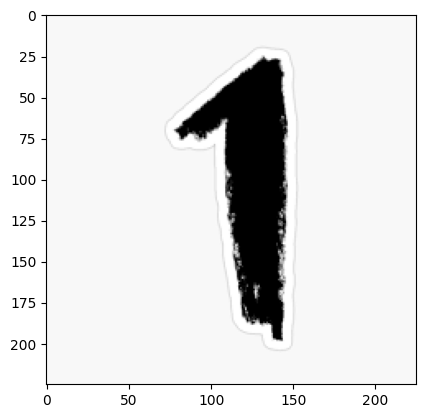

In [12]:
import cv2
import matplotlib.pyplot as plt
# Faire une prédiction d'une image de test
image_1 = cv2.imread("datasets/1.png")
plt.imshow(image_1)
# Tester avec les images présentes dans le dossier "datasets"

(28, 28)

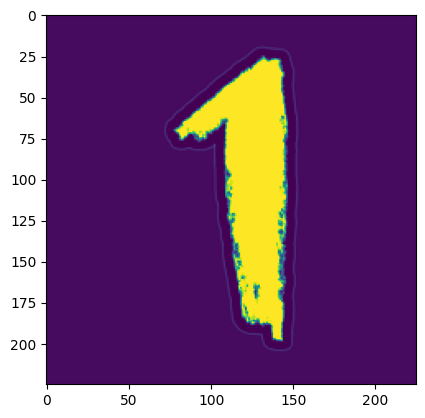

In [15]:
import numpy as np
image1_grey = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
image1_grey = cv2.bitwise_not(image1_grey)
plt.imshow(image1_grey)
image1_resized = cv2.resize(image1_grey, (28, 28)) / 255
image1_resized.shape

1/1 [==============================] - 0s 468ms/step
1


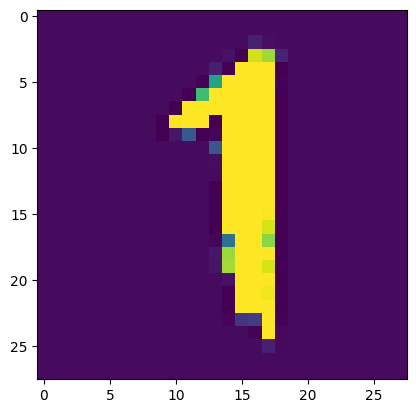

In [16]:
plt.imshow(image1_resized)
x = np.expand_dims(image1_resized, axis=0)
x.shape

y_prob = model.predict(x)
print(y_prob[0].argmax())